<font size = 5>ЦЕЛЬ

1. Для понимания эффективности новой фичи нужно посчитать показатели Retention 7 дня  и ARPPU за два периода: до и после внедрения фичи

2. Сформировать выводы по анализу



1. Считаем Retention 7 дня за период до релиза (май 2019). Чтобы посчитать retention не для одной даты, а для всего периода, необходимо разделить сумму по столбцу "7 день" для всех входящих в период когорт и разделить на сумму по столбцу "зарегистрировано клиентов" для этих же когорт.

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import psycopg2
import psycopg2.extras 

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [ ]:
#определим количество зарегистрировавшихся пользователей в каждый день июня
def getRegisteredUsersCount_june():
    query = '''SELECT r.registration_date, count(distinct(r.user_id)) as registered_users_count
    FROM case9.registration r
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

registered_users_count_june = pd.DataFrame(getRegisteredUsersCount_june())

In [ ]:
#определим количество зарегистрировавшихся пользователей в каждый день мая
def getRegisteredUsersCount_may():
    query = '''SELECT r.registration_date, count(distinct(r.user_id)) as registered_users_count
    FROM case9.registration r
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

registered_users_count_may = pd.DataFrame(getRegisteredUsersCount_may())

In [ ]:
#получаем информацию о датафреймах
registered_users_count_june.info()
registered_users_count_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   registration_date       30 non-null     object
 1   registered_users_count  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   registration_date       31 non-null     object
 1   registered_users_count  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes


In [ ]:
#преобразуем формат дат в столбцах 
registered_users_count_june['registration_date'] = pd.to_datetime(registered_users_count_june['registration_date'])
registered_users_count_may['registration_date'] = pd.to_datetime(registered_users_count_may['registration_date'])

In [ ]:
#посчитаем пользователей, зарегистрированных по месяцам
print('Зарегистрированных пользователей в июне (после внедрения фичи):',registered_users_count_june['registered_users_count'].sum())
print('Зарегистрированных пользователей в мае (до внедрения фичи):',registered_users_count_may['registered_users_count'].sum())

Зарегистрированных пользователей в июне (после внедрения фичи): 100423
Зарегистрированных пользователей в мае (до внедрения фичи): 188943


In [ ]:
#посотрим наши df
display(registered_users_count_june.head())
display(registered_users_count_june.head())

,registration_date,registered_users_count
0,2019-06-01,4833
1,2019-06-02,5255
2,2019-06-03,4193
3,2019-06-04,4194
4,2019-06-05,3998


,registration_date,registered_users_count
0,2019-06-01,4833
1,2019-06-02,5255
2,2019-06-03,4193
3,2019-06-04,4194
4,2019-06-05,3998


In [ ]:
#получим данные об активных пользователях из базы и подсчитаем по дням количество активных пользователей с указанием даты регистрации за июнь
def getActiveUsersCountWithCohorts_june():
    query = '''SELECT ac.activity_date, r.registration_date, count(distinct(ac.user_id)) as active_users_count
    FROM case9.user_activity ac
    LEFT JOIN case9.registration r ON r.user_id = ac.user_id
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

active_users_count_with_cohorts_june = pd.DataFrame(getActiveUsersCountWithCohorts_june())

In [ ]:
#получим данные об активных пользователях из базы и подсчитаем по дням количество активных пользователей с указанием даты регистрации за май
def getActiveUsersCountWithCohorts_may():
    query = '''SELECT ac.activity_date, r.registration_date, count(distinct(ac.user_id)) as active_users_count
    FROM case9.user_activity ac
    LEFT JOIN case9.registration r ON r.user_id = ac.user_id
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

active_users_count_with_cohorts_may = pd.DataFrame(getActiveUsersCountWithCohorts_may())

In [ ]:
#проверим что получилось
active_users_count_with_cohorts_june.info()
active_users_count_with_cohorts_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_date       930 non-null    object
 1   registration_date   930 non-null    object
 2   active_users_count  930 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   activity_date       961 non-null    object
 1   registration_date   961 non-null    object
 2   active_users_count  961 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 22.6+ KB


In [ ]:
#колонки с датами преобразуем в формат дат сначала за июнь
for col in ['activity_date','registration_date']:
    active_users_count_with_cohorts_june[col] = pd.to_datetime(active_users_count_with_cohorts_june[col])

In [ ]:
#колонки с датами преобразуем в формат дат за май
for col in ['activity_date','registration_date']:
    active_users_count_with_cohorts_may[col] = pd.to_datetime(active_users_count_with_cohorts_may[col])

In [ ]:
#посмотрим полученных df
display(active_users_count_with_cohorts_june.head())
display(active_users_count_with_cohorts_may.head())

,activity_date,registration_date,active_users_count
0,2019-06-01,2019-06-01,1651
1,2019-06-02,2019-06-01,1429
2,2019-06-02,2019-06-02,1933
3,2019-06-03,2019-06-01,1021
4,2019-06-03,2019-06-02,1550


,activity_date,registration_date,active_users_count
0,2019-05-01,2019-05-01,2590
1,2019-05-02,2019-05-01,2146
2,2019-05-02,2019-05-02,2049
3,2019-05-03,2019-05-01,1637
4,2019-05-03,2019-05-02,1817


In [ ]:
#Объединим таблицы по выбранной колонке и запишем сводные данные в датафрейм за июнь
retention_table_june = active_users_count_with_cohorts_june.merge(registered_users_count_june,on=['registration_date'],how='left')
retention_table_june.head()

,activity_date,registration_date,active_users_count,registered_users_count
0,2019-06-01,2019-06-01,1651,4833
1,2019-06-02,2019-06-01,1429,4833
2,2019-06-02,2019-06-02,1933,5255
3,2019-06-03,2019-06-01,1021,4833
4,2019-06-03,2019-06-02,1550,5255


In [ ]:
#Объединим таблицы по выбранной колонке и запишем сводные данные в датафрейм за май
retention_table_may = active_users_count_with_cohorts_may.merge(registered_users_count_may,on=['registration_date'],how='left')
retention_table_may.head()

,activity_date,registration_date,active_users_count,registered_users_count
0,2019-05-01,2019-05-01,2590,6516
1,2019-05-02,2019-05-01,2146,6516
2,2019-05-02,2019-05-02,2049,5309
3,2019-05-03,2019-05-01,1637,6516
4,2019-05-03,2019-05-02,1817,5309


In [ ]:
#рассчитываем показатель Retention Rate за июнь
retention_table_june['retention_rate'] = retention_table_june['active_users_count'] / retention_table_june['registered_users_count']
retention_table_june.head()


,activity_date,registration_date,active_users_count,registered_users_count,retention_rate
0,2019-06-01,2019-06-01,1651,4833,0.341610
1,2019-06-02,2019-06-01,1429,4833,0.295676
2,2019-06-02,2019-06-02,1933,5255,0.367840
3,2019-06-03,2019-06-01,1021,4833,0.211256
4,2019-06-03,2019-06-02,1550,5255,0.294957


In [ ]:
#рассчитываем показатель Retention Rate за май
retention_table_may['retention_rate'] = retention_table_may['active_users_count'] / retention_table_may['registered_users_count']
retention_table_may.head()

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate
0,2019-05-01,2019-05-01,2590,6516,0.397483
1,2019-05-02,2019-05-01,2146,6516,0.329343
2,2019-05-02,2019-05-02,2049,5309,0.385948
3,2019-05-03,2019-05-01,1637,6516,0.251228
4,2019-05-03,2019-05-02,1817,5309,0.342249


In [ ]:
#определяем, какое количество дней прошло с момента регистрации до определённого дня активности за июнь
retention_table_june['lifetime'] = retention_table_june['activity_date'] - retention_table_june['registration_date']
retention_table_june['lifetime'].head()

0   0 days
1   1 days
2   0 days
3   2 days
4   1 days
Name: lifetime, dtype: timedelta64[ns]

In [ ]:
#определяем, какое количество дней прошло с момента регистрации до определённого дня активности за май
retention_table_may['lifetime'] = retention_table_may['activity_date'] - retention_table_may['registration_date']
retention_table_may['lifetime'].head()

0   0 days
1   1 days
2   0 days
3   2 days
4   1 days
Name: lifetime, dtype: timedelta64[ns]

In [ ]:
#Нам нужно получить целое количество дней, поэтому значения в колонке с типом timedelta мы разделим на константу np.timedelta64(1,'D') 
#июнь
retention_table_june['lifetime'] = retention_table_june['lifetime']/np.timedelta64(1,'D')
retention_table_june['lifetime'] = retention_table_june['lifetime'].astype(int) # Приведем тип к целому числу
retention_table_june['lifetime'].head()

0    0
1    1
2    0
3    2
4    1
Name: lifetime, dtype: int64

In [ ]:
#Нам нужно получить целое количество дней, поэтому значения в колонке с типом timedelta мы разделим на константу np.timedelta64(1,'D') 
#май
retention_table_may['lifetime'] = retention_table_may['lifetime']/np.timedelta64(1,'D')
retention_table_may['lifetime'] = retention_table_may['lifetime'].astype(int) # Приведем тип к целому числу
retention_table_may['lifetime'].head()

0    0
1    1
2    0
3    2
4    1
Name: lifetime, dtype: int64

In [ ]:
#формируем сводную таблицу за июнь
retention_pivot_june = retention_table_june.pivot_table(index='registration_date',columns='lifetime',values='retention_rate',aggfunc='sum')
retention_pivot_june

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
registration_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-06-01,0.341610,0.295676,0.211256,0.175667,0.143596,0.134906,0.121664,0.112766,0.110904,0.099938,0.095179,0.087523,0.082764,0.079247,0.078212,0.073453,0.070970,0.066625,0.064763,0.062487,0.064556,0.060418,0.061246,0.058763,0.055245,0.056487,0.050693,0.049659,0.050693,0.042003,0.028968
2019-06-02,0.367840,0.294957,0.221313,0.188202,0.164225,0.145576,0.130923,0.129971,0.121598,0.109610,0.103711,0.090771,0.091912,0.089629,0.089439,0.082778,0.081066,0.078021,0.076879,0.075167,0.070790,0.073073,0.071931,0.068506,0.062797,0.061656,0.062797,0.063178,0.060514,0.044719,0.028925
2019-06-03,0.341522,0.296685,0.207727,0.173384,0.150727,0.123062,0.118054,0.115430,0.111376,0.099213,0.093966,0.086096,0.084903,0.077510,0.080611,0.076795,0.076318,0.072979,0.067016,0.067016,0.067016,0.065109,0.064870,0.063916,0.057238,0.056284,0.051753,0.052707,0.051991,0.041975,0.028858
2019-06-04,0.351216,0.296853,0.229852,0.180019,0.147592,0.133047,0.135670,0.121841,0.106581,0.098236,0.090129,0.087744,0.079876,0.085122,0.080114,0.074154,0.067716,0.064855,0.065331,0.063186,0.064855,0.063662,0.060324,0.058417,0.053648,0.051502,0.051979,0.051264,0.047926,0.036242,0.023605
2019-06-05,0.337419,0.305403,0.223112,0.172336,0.147324,0.140570,0.131816,0.118059,0.108304,0.097799,0.094297,0.089045,0.087794,0.086043,0.084042,0.075288,0.075038,0.070285,0.069035,0.069785,0.069535,0.066033,0.064282,0.060030,0.056278,0.054527,0.054527,0.053527,0.051026,0.037519,0.027514
2019-06-06,0.362845,0.306551,0.208802,0.178864,0.169396,0.141505,0.131013,0.117707,0.109519,0.098516,0.096213,0.092375,0.090072,0.090072,0.085722,0.079324,0.072671,0.071904,0.074463,0.069857,0.066018,0.066018,0.063715,0.064483,0.057318,0.056551,0.055015,0.055527,0.055271,0.045803,0.030194
2019-06-07,0.370719,0.294691,0.219290,0.190386,0.171222,0.147345,0.129752,0.120955,0.108702,0.106189,0.102105,0.093937,0.093622,0.089224,0.090481,0.083883,0.080741,0.080741,0.078856,0.075401,0.073830,0.068803,0.068803,0.068175,0.068175,0.063776,0.064719,0.062834,0.059692,0.045240,0.027961
2019-06-08,0.361902,0.330097,0.251423,0.204553,0.179444,0.156344,0.144961,0.141948,0.127218,0.116170,0.110479,0.104118,0.102444,0.098761,0.091731,0.089722,0.092066,0.085370,0.085035,0.081353,0.082022,0.076666,0.071979,0.072648,0.071979,0.067626,0.066622,0.066622,0.065618,0.052896,0.037496
2019-06-09,0.363961,0.321811,0.234835,0.192685,0.165923,0.149643,0.143845,0.136039,0.118198,0.113069,0.106824,0.102141,0.098573,0.098796,0.097235,0.090321,0.087868,0.085415,0.081178,0.076494,0.076494,0.081401,0.074710,0.071142,0.066905,0.068020,0.065343,0.066236,0.062444,0.049286,0.031891


In [ ]:
#формируем сводную таблицу за май
retention_pivot_may = retention_table_may.pivot_table(index='registration_date',columns='lifetime',values='retention_rate',aggfunc='sum')
retention_pivot_may

lifetime,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
registration_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-01,0.397483,0.329343,0.251228,0.222683,0.198895,0.174954,0.153929,0.146255,0.133671,0.123082,0.115869,0.113260,0.106200,0.098834,0.096378,0.090393,0.086556,0.084408,0.084715,0.078729,0.077348,0.072284,0.069828,0.068754,0.067219,0.067373,0.063536,0.062922,0.060773,0.043738,0.029619
2019-05-02,0.385948,0.342249,0.254285,0.219062,0.193633,0.164061,0.152006,0.140328,0.125071,0.117160,0.111320,0.102844,0.098512,0.095875,0.089094,0.084762,0.076662,0.079111,0.075344,0.074779,0.069128,0.067056,0.059522,0.059898,0.061217,0.060652,0.058768,0.055943,0.053682,0.045018,0.031456
2019-05-03,0.381264,0.339291,0.256783,0.219438,0.188477,0.170124,0.148899,0.142834,0.132301,0.126716,0.112033,0.106288,0.101660,0.100383,0.091765,0.085701,0.086020,0.087297,0.082668,0.078040,0.075327,0.071976,0.070859,0.072455,0.069103,0.067028,0.066550,0.063837,0.060166,0.046920,0.030961
2019-05-04,0.384651,0.335224,0.241232,0.191573,0.169348,0.150249,0.140178,0.137284,0.131728,0.116796,0.109040,0.102790,0.096770,0.093877,0.094224,0.092256,0.086121,0.081259,0.078829,0.075124,0.074198,0.072925,0.071420,0.066906,0.065401,0.064012,0.061465,0.058456,0.057646,0.043176,0.029286
2019-05-05,0.383161,0.311944,0.227751,0.192398,0.170737,0.152549,0.145397,0.138755,0.121488,0.113518,0.106468,0.100439,0.094411,0.088689,0.090835,0.083682,0.079800,0.076734,0.075100,0.070808,0.068765,0.067641,0.063962,0.061101,0.060693,0.058547,0.057014,0.053438,0.054256,0.043936,0.027179
2019-05-06,0.368205,0.312260,0.227748,0.191377,0.162809,0.147732,0.137680,0.130274,0.117445,0.105806,0.098929,0.089406,0.086496,0.083851,0.082397,0.079751,0.073932,0.068642,0.067055,0.065864,0.064409,0.065997,0.062029,0.060045,0.055680,0.053829,0.050919,0.049597,0.048142,0.035048,0.021690
2019-05-07,0.366349,0.326020,0.239393,0.206808,0.172770,0.153251,0.142926,0.137280,0.124859,0.113405,0.105501,0.097758,0.090176,0.093241,0.092757,0.084046,0.080174,0.075173,0.071786,0.067753,0.070818,0.070657,0.062591,0.063559,0.060816,0.058235,0.057106,0.057590,0.055815,0.041781,0.028392
2019-05-08,0.393985,0.328271,0.245564,0.198195,0.176241,0.156692,0.142707,0.132782,0.121353,0.110977,0.101203,0.094887,0.091729,0.086767,0.083158,0.078797,0.076090,0.076090,0.071128,0.069774,0.069173,0.066316,0.063910,0.058195,0.056842,0.053534,0.053835,0.052632,0.048872,0.038496,0.026617
2019-05-09,0.377529,0.320909,0.236777,0.205183,0.180866,0.163649,0.147497,0.136138,0.124068,0.113774,0.107916,0.104011,0.097799,0.091232,0.085197,0.085907,0.082002,0.076855,0.074192,0.074547,0.072595,0.067093,0.066205,0.061945,0.060703,0.058218,0.055201,0.053958,0.054846,0.045971,0.029464


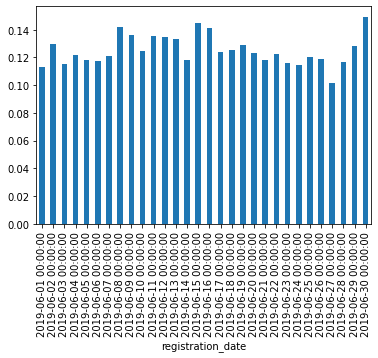

In [ ]:
#оценим изменение Retention Rate когорт на седьмой день за июнь
retention_pivot_june[7].plot.bar()


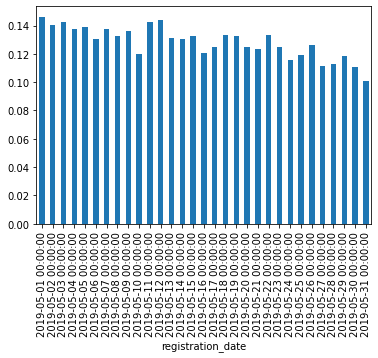

In [ ]:
#оценим изменение Retention Rate когорт на седьмой день за май
retention_pivot_may[7].plot.bar()

In [ ]:
#напишем функцию, чтобы получить выручку по дням в разрезе когорт для пользователей, зарегистрировавшихся в июне
def getRevenue_june():
    query = '''SELECT re.date, r.registration_date, count(distinct(re.user_id)) as users_count_with_revenue, sum(re.revenue) as revenue
    FROM case9.user_revenue re
    LEFT JOIN case9.registration r ON r.user_id = re.user_id
    WHERE r.registration_date >= '2019-06-01' and r.registration_date < '2019-07-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

revenue_june = pd.DataFrame(getRevenue_june())

In [ ]:
#напишем функцию, чтобы получить выручку по дням в разрезе когорт для пользователей, зарегистрировавшихся в мае
def getRevenue_may():
    query = '''SELECT re.date, r.registration_date, count(distinct(re.user_id)) as users_count_with_revenue, sum(re.revenue) as revenue
    FROM case9.user_revenue re
    LEFT JOIN case9.registration r ON r.user_id = re.user_id
    WHERE r.registration_date >= '2019-05-01' and r.registration_date < '2019-06-01'
    GROUP BY 1,2
    '''.format()
    conn = psycopg2.connect("dbname='skillfactory' user='skillfactory' host='84.201.134.129' password='cCkxxLVrDE8EbvjueeMedPKt' port=5432")
    dict_cur = conn.cursor(cursor_factory=psycopg2.extras.DictCursor)
    dict_cur.execute(query)
    rows = dict_cur.fetchall()
    data = []
    for row in rows:
        data.append(dict(row))
    return data

revenue_may = pd.DataFrame(getRevenue_may())

In [ ]:
#посмотрим информацию получившихся df
revenue_june.info()
revenue_may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 833 entries, 0 to 832
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      833 non-null    object 
 1   registration_date         833 non-null    object 
 2   users_count_with_revenue  833 non-null    int64  
 3   revenue                   833 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 26.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      912 non-null    object 
 1   registration_date         912 non-null    object 
 2   users_count_with_revenue  912 non-null    int64  
 3   revenue                   912 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 28.6+ KB


In [ ]:
#снова преобразуем столбцы дат, сначала за июнь
for col in ['date','registration_date']:
    revenue_june[col] = pd.to_datetime(revenue_june[col])

In [ ]:
#аналогично с маем
for col in ['date','registration_date']:
    revenue_may[col] = pd.to_datetime(revenue_may[col])

In [ ]:
#посмотрим df
display(revenue_june.head())
display(revenue_may.head())

,date,registration_date,users_count_with_revenue,revenue
0,2019-06-01,2019-06-01,1082,1611.860
1,2019-06-02,2019-06-01,928,317.738
2,2019-06-02,2019-06-02,1257,1305.220
3,2019-06-03,2019-06-01,623,192.273
4,2019-06-03,2019-06-02,1008,554.859


,date,registration_date,users_count_with_revenue,revenue
0,2019-05-01,2019-05-01,1672,2357.590
1,2019-05-02,2019-05-01,1420,514.679
2,2019-05-02,2019-05-02,1367,1629.140
3,2019-05-03,2019-05-01,1048,390.952
4,2019-05-03,2019-05-02,1164,533.608


In [ ]:
#посчитаем сумму выручки, которую принесли пользователи, зарегистрировавшиеся до и после внедрения фичи
print('Выручка от пользователей после внедрения фичи:',revenue_june['revenue'].sum())
print('Выручка от пользователей до внедрения фичи:',revenue_may['revenue'].sum())


Выручка от пользователей после внедрения фичи: 79685.869277
Выручка от пользователей до внедрения фичи: 121998.29795000001


In [ ]:
#посчитаем пользователей, которые зарегестрировались до и после внедрения фичи
print('Зарегистрировавшихся пользователей после внедрения фичи:',registered_users_count_june['registered_users_count'].sum())
print('Зарегистрировавшихся пользователей до внедрения фичи:',registered_users_count_may['registered_users_count'].sum())

Зарегистрировавшихся пользователей после внедрения фичи: 100423
Зарегистрировавшихся пользователей до внедрения фичи: 188943


In [ ]:
#мы можем рассчитать среднюю выручку за месяц с пользователей, зарегистрировавшихся в мае и июне
print('Средняя выручка за месяц с пользователей, зарегистрировавшихся в июне после внедрения фичи:',revenue_june['revenue'].sum()/registered_users_count_june['registered_users_count'].sum())
print('Средняя выручка за месяц с пользователей, зарегистрировавшихся в мае до внедрения фичи:',revenue_may['revenue'].sum()/registered_users_count_may['registered_users_count'].sum())

Средняя выручка за месяц с пользователей, зарегистрировавшихся в июне после внедрения фичи: 0.7935021785547136
Средняя выручка за месяц с пользователей, зарегистрировавшихся в мае до внедрения фичи: 0.6456883713606749


In [ ]:
#переименуем столбцы, чтобы в дальнейшем удобнее было объединять
revenue_june = revenue_june.rename(columns={'date':'activity_date'})
revenue_may = revenue_may.rename(columns={'date':'activity_date'})

In [ ]:
#объединяем df
retention_table_with_revenue_june = retention_table_june.merge(revenue_june,on=['registration_date','activity_date'],how='left')
retention_table_with_revenue_may = retention_table_may.merge(revenue_may,on=['registration_date','activity_date'],how='left')

In [ ]:
#посмотрим получившиеся df
display(retention_table_with_revenue_june.head())
display(retention_table_with_revenue_may.head())

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082.0,1611.860
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928.0,317.738
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257.0,1305.220
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623.0,192.273
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008.0,554.859


,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue
0,2019-05-01,2019-05-01,2590,6516,0.397483,0,1672.0,2357.590
1,2019-05-02,2019-05-01,2146,6516,0.329343,1,1420.0,514.679
2,2019-05-02,2019-05-02,2049,5309,0.385948,0,1367.0,1629.140
3,2019-05-03,2019-05-01,1637,6516,0.251228,2,1048.0,390.952
4,2019-05-03,2019-05-02,1817,5309,0.342249,1,1164.0,533.608


In [ ]:
#посмотрим углубленно df
display(retention_table_with_revenue_june.info())
display(retention_table_with_revenue_may.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930 entries, 0 to 929
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   activity_date             930 non-null    datetime64[ns]
 1   registration_date         930 non-null    datetime64[ns]
 2   active_users_count        930 non-null    int64         
 3   registered_users_count    930 non-null    int64         
 4   retention_rate            930 non-null    float64       
 5   lifetime                  930 non-null    int64         
 6   users_count_with_revenue  833 non-null    float64       
 7   revenue                   833 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 65.4 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 0 to 960
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   activity_date             961 non-null    datetime64[ns]
 1   registration_date         961 non-null    datetime64[ns]
 2   active_users_count        961 non-null    int64         
 3   registered_users_count    961 non-null    int64         
 4   retention_rate            961 non-null    float64       
 5   lifetime                  961 non-null    int64         
 6   users_count_with_revenue  912 non-null    float64       
 7   revenue                   912 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(3)
memory usage: 67.6 KB


None

In [ ]:
#После объединения видим, что есть пропущенные значения. Это говорит о том, что не во все дни была выручка с пользователей. Произведём замену пропущенных значений на 0
#за июнь
for col in ['revenue','users_count_with_revenue']:
    retention_table_with_revenue_june[col] = retention_table_with_revenue_june[col].fillna(0)

In [ ]:
# аналогично за май
for col in ['revenue','users_count_with_revenue']:
    retention_table_with_revenue_may[col] = retention_table_with_revenue_may[col].fillna(0)

In [ ]:
#Преобразуем тип в колонке users_count_with_revenue в целочисленный
retention_table_with_revenue_june['users_count_with_revenue'] = retention_table_with_revenue_june['users_count_with_revenue'].astype(int)
retention_table_with_revenue_may['users_count_with_revenue'] = retention_table_with_revenue_may['users_count_with_revenue'].astype(int)

In [ ]:
#посчитаем ARPPU
retention_table_with_revenue_june['arppu'] = retention_table_with_revenue_june['revenue']/retention_table_with_revenue_june['users_count_with_revenue']
retention_table_with_revenue_may['arppu'] = retention_table_with_revenue_may['revenue']/retention_table_with_revenue_may['users_count_with_revenue']

In [ ]:
display(retention_table_with_revenue_june)
display(retention_table_with_revenue_may)

,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue,arppu
0,2019-06-01,2019-06-01,1651,4833,0.341610,0,1082,1611.86000,1.489704
1,2019-06-02,2019-06-01,1429,4833,0.295676,1,928,317.73800,0.342390
2,2019-06-02,2019-06-02,1933,5255,0.367840,0,1257,1305.22000,1.038361
3,2019-06-03,2019-06-01,1021,4833,0.211256,2,623,192.27300,0.308624
4,2019-06-03,2019-06-02,1550,5255,0.294957,1,1008,554.85900,0.550455
...,...,...,...,...,...,...,...,...,...
925,2019-07-28,2019-06-29,129,2968,0.043464,29,86,29.05720,0.337874
926,2019-07-28,2019-06-30,198,3301,0.059982,28,0,0.00000,NaN
927,2019-07-29,2019-06-29,89,2968,0.029987,30,62,5.45989,0.088063
928,2019-07-29,2019-06-30,144,3301,0.043623,29,100,10.05400,0.100540


,activity_date,registration_date,active_users_count,registered_users_count,retention_rate,lifetime,users_count_with_revenue,revenue,arppu
0,2019-05-01,2019-05-01,2590,6516,0.397483,0,1672,2357.59000,1.410042
1,2019-05-02,2019-05-01,2146,6516,0.329343,1,1420,514.67900,0.362450
2,2019-05-02,2019-05-02,2049,5309,0.385948,0,1367,1629.14000,1.191763
3,2019-05-03,2019-05-01,1637,6516,0.251228,2,1048,390.95200,0.373046
4,2019-05-03,2019-05-02,1817,5309,0.342249,1,1164,533.60800,0.458426
...,...,...,...,...,...,...,...,...,...
956,2019-06-28,2019-05-30,219,5239,0.041802,29,142,4.56175,0.032125
957,2019-06-28,2019-05-31,199,4724,0.042125,28,131,77.18220,0.589177
958,2019-06-29,2019-05-30,138,5239,0.026341,30,90,68.09330,0.756592
959,2019-06-29,2019-05-31,155,4724,0.032811,29,100,6.61193,0.066119


In [ ]:
#посчитаем суммарное ARPPU
arppu_june = retention_table_with_revenue_june['revenue'].sum()/retention_table_with_revenue_june['users_count_with_revenue'].sum()
arppu_may = retention_table_with_revenue_may['revenue'].sum()/retention_table_with_revenue_may['users_count_with_revenue'].sum()
print('В мае, до релиза, ARPPU = ',arppu_may)
print('В июне, после релиза, ARPPU = ',arppu_june)

В мае, до релиза, ARPPU =  0.30612457926102504
В июне, после релиза, ARPPU =  0.3931939686918678


In [ ]:
retention_7_june  = round(retention_table_with_revenue_june['active_users_count'][retention_table_with_revenue_june['lifetime'] == 7].sum()  / retention_table_with_revenue_june['registered_users_count'][retention_table_with_revenue_june['lifetime'] == 7].sum(), 3)
print('Retention Rate седьмого дня в июне (после внедрения фичи):',retention_7_june)
retention_7_may  = round(retention_table_with_revenue_may['active_users_count'][retention_table_with_revenue_may['lifetime'] == 7].sum()  / retention_table_with_revenue_may['registered_users_count'][retention_table_with_revenue_may['lifetime'] == 7].sum(), 3)
print('Retention Rate седьмого дня в мае (до внедрения фичи):',retention_7_may)

Retention Rate седьмого дня в июне (после внедрения фичи): 0.126
Retention Rate седьмого дня в мае (до внедрения фичи): 0.129


Выводы:
* Retention 7 дня остался примерно на прежнем уровне
* Тем не менее ARPPU в июне вырос на 30%

Фича оказалась вполне эффективна. Во всяком случае, ARPPU она не обрушила, а значит можно оставлять ее на проде.

